In [168]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import defaultdict
from scipy.spatial.distance import cdist
mpl.rcParams['axes.linewidth'] = 2
from DEPENDENCIES.recycle import *
from scipy.interpolate import interp2d

In [198]:
def read_helpol(bname, ndxs, excl=[]):
    data = [read_text_file("HELPOL/{}{}_helpol.sfu".format(bname, ndx)) for ndx in ndxs.astype('int') if ndx not in excl]
    lens = np.array([len(d) for d in data])
    data = np.array(data)
    data = data[lens == np.max(lens)]
    data = np.array(data)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    return data
def center_bins(bins):
    return 0.5*(bins[1:]+bins[:-1])

def polar_hist2d(radians, dzs, bins=(30,30)):
    xspace = np.linspace(0, np.pi, bins[0])
    dx = xspace[1] - xspace[0]
    yspace = np.linspace(0, 5, bins[1])
    dy = yspace[1] - yspace[0]
    X, Y = np.meshgrid(xspace, yspace)
    areas = Y[1:,1:]*dy*dx
    
    H, xedges, yedges = np.histogram2d(radians, dzs, bins=[xspace, yspace], range=[[0, np.pi],[0,5]])
    first_int = np.array([np.multiply(h,yspace[1:]*dy) for h in H.T]).sum(axis=0)
    norm = np.sum(first_int*dx)
    return (H/norm), xedges, yedges

In [250]:
def plot_hpol(hpol, fname="tmp"):
    nth = 4
    radians = hpol[:,1]*np.pi/180
    dz = hpol[:,0]
    ytl = [0,1,2,3,4,5]
    xt = np.array([np.pi/nth*th for th in range(nth+1)])
    xtl = []#np.array([(180/nth*th) for th in range(nth+1)]).astype('int')
    fig = plt.figure(figsize=(10,5))

    ax = plt.subplot(121, projection='polar')
    ax.scatter(radians, dz, s=1, alpha=0.2, color=(0,0.8,0.4))
    ax.set_xlim((0,np.pi))
    ax.set_ylim((0,5))
    ax.tick_params(labelsize=Z)
    ax.set_xticks(xt)
    ax.set_xticklabels(xtl)
    ax.set_theta_zero_location("N")
    ax.set_yticks(ytl)
    ax.set_yticklabels(ytl)
    rdns = np.linspace(0,np.pi,100)
    ax.plot(rdns, [2]*len(rdns), ls='-', lw=2.5, c=(0.4,0,0.7))
        
    ax = plt.subplot(122, projection='polar')
    H, xedges, yedges = polar_hist2d(radians, dz, bins=(30,30))
    xedges, yedges = np.linspace(np.min(xedges), np.max(xedges), len(xedges)-1), np.linspace(np.min(yedges), np.max(yedges), len(yedges)-1)
    ax.set_xlim((-np.pi,0))
    ax.set_ylim((0,5))
    ax.tick_params(labelsize=Z)
    ax.set_xticks(-1*xt)
    ax.set_xticklabels(xtl)
    ax.set_theta_zero_location("N")
    ax.set_yticks(ytl)
    ax.set_yticklabels(ytl)
    rdns = np.linspace(0,np.pi,100)
    ax.plot(-1*rdns, [2]*len(rdns), ls='-', lw=2.5, c=(0.4,0,0.7))
    
    THETA, DZ = np.meshgrid(xedges, yedges)
    cax = ax.pcolormesh(-1*THETA, DZ, (H*np.pi/180).T, cmap='PuRd', shading='gouraud', vmin=0.0, vmax=0.003)
    a = plt.axes([0.95, 0.175, 0.04, 0.65])
    cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[0,0.001,0.002,0.003])
    cbar.ax.tick_params(labelsize=Z)
    cbar.ax.set_ylabel("Probability density\n($nm^{-1}$ $deg^{-1}$)", fontsize=Z)
    ax.invert_xaxis()
    ax.grid()
    plt.savefig("Plots/{}_helpol.png".format(fname), format='png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

In [152]:
g5_1_hpol = read_helpol("G5_1/gH-POPC5-46-r1_MD", np.linspace(0,53,54), excl=[7,31,41])
g5_2_hpol = read_helpol("G5_2/gH-POPC5-46-r2_MD", np.linspace(0,55,56), excl=[24, 29])
g6_1_hpol = read_helpol("G6_1/gH-POPC6-46-r1_MD", np.linspace(0,54,55), excl=[])
g6_2_hpol = read_helpol("G6_2/gH-POPC6-46-r2_MD", np.linspace(0,53,54), excl=[38, 41, 42])

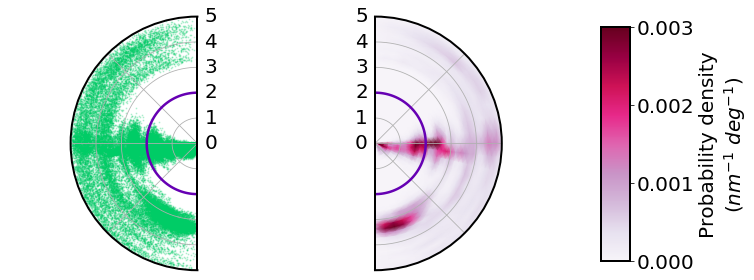

In [251]:
plot_hpol(g5_1_hpol, 'g5_1')

gH in POPC (Replica 1)


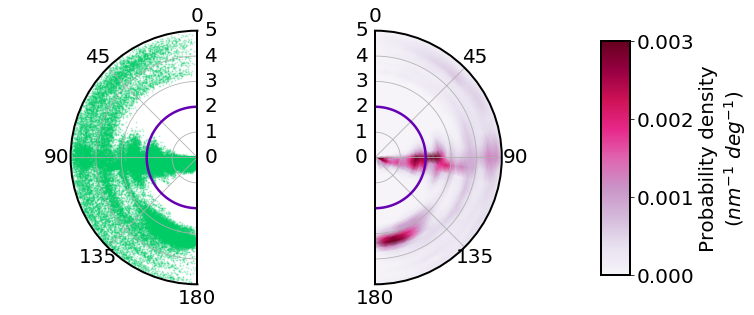

gH in POPC (Replica 2)


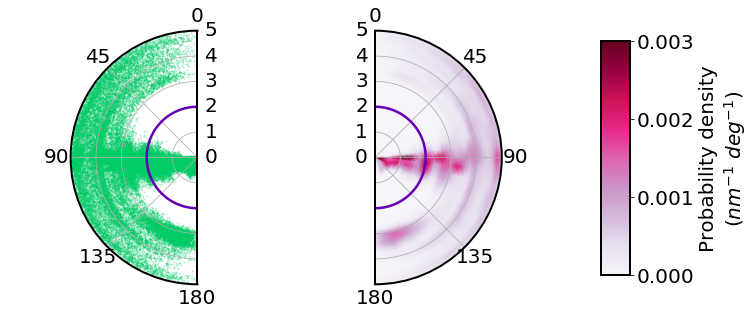

gH in POPC:CHOL (Replica 1)


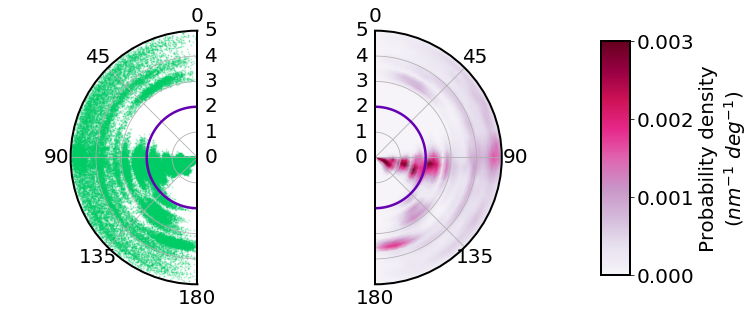

gH in POPC:CHOL (Replica 2)


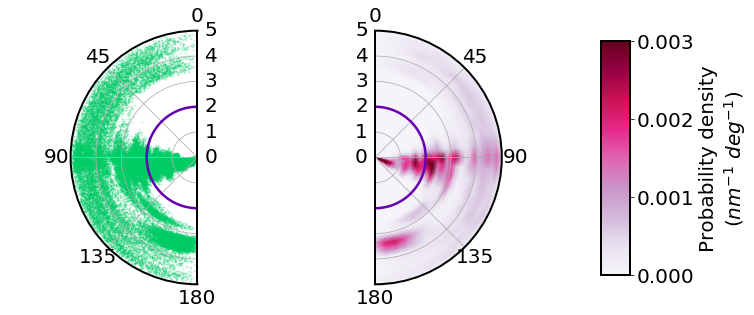

In [249]:
print("gH in POPC (Replica 1)")
plot_hpol(g5_1_hpol, 'g5_1')
print("gH in POPC (Replica 2)")
plot_hpol(g5_2_hpol, 'g5_2')
print("gH in POPC:CHOL (Replica 1)")
plot_hpol(g6_1_hpol, 'g6_1')
print("gH in POPC:CHOL (Replica 2)")
plot_hpol(g6_2_hpol, 'g6_2')